In [22]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense,Conv2D,MaxPooling2D,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [3]:
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()
x_train.shape

(60000, 28, 28)

In [4]:
x_test.shape

(10000, 28, 28)

In [6]:
x_train[0].shape

(28, 28)

In [8]:
classes={0:"Tshirt/Top",
        1:"Trouser",
        2:"Pullover",
        3:"Dress",
        4:"Cot",
        5:"Sandal",
        6:"Shirt",
        7:"Sneaker",
        8:"Bag",
        9:"Ankle boot"}

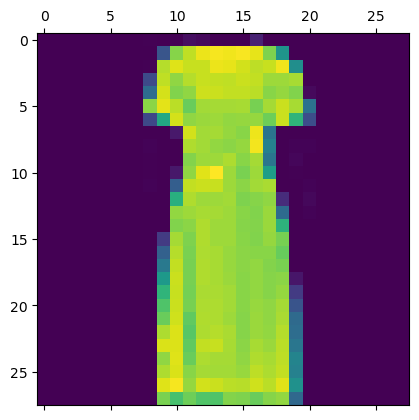

In [9]:
plt.matshow(x_train[50])

In [11]:
classes[y_train[50]]

'Dress'

In [13]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],x_train.shape[2],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],x_test.shape[2],1)
x_train.shape

(60000, 28, 28, 1)

In [15]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(28,28,1),strides=(2,2),padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Conv2D(32,(3,3),activation="relu"))
model.add(Conv2D(32,(3,3),activation="relu"))
model.add(Flatten())
model.add(Dense(32,activation="relu"))
model.add(Dense(10,activation="softmax"))


In [26]:
model.compile(loss="sparse_categorical_crossentropy",optimizer=Adam(),metrics=["accuracy"])

In [27]:
trained_info=model.fit(x_train,y_train,batch_size=1000,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10


60/60 [==============================] - 12s 168ms/step - loss: 3.3863 - accuracy: 0.2603 - val_loss: 1.5131 - val_accuracy: 0.4548
Epoch 2/10
60/60 [==============================] - 10s 171ms/step - loss: 1.4281 - accuracy: 0.4912 - val_loss: 1.0590 - val_accuracy: 0.6176
Epoch 3/10
60/60 [==============================] - 10s 159ms/step - loss: 1.0019 - accuracy: 0.6555 - val_loss: 0.7363 - val_accuracy: 0.7279
Epoch 4/10
60/60 [==============================] - 10s 164ms/step - loss: 0.7690 - accuracy: 0.7116 - val_loss: 0.6337 - val_accuracy: 0.7586
Epoch 5/10
60/60 [==============================] - 10s 170ms/step - loss: 0.6852 - accuracy: 0.7394 - val_loss: 0.5781 - val_accuracy: 0.7813
Epoch 6/10
60/60 [==============================] - 10s 163ms/step - loss: 0.6298 - accuracy: 0.7607 - val_loss: 0.5468 - val_accuracy: 0.7936
Epoch 7/10
60/60 [==============================] - 10s 160ms/step - loss: 0.5901 - accuracy: 0.7774 - val_loss: 0.5128 - val_accuracy: 0.81

In [29]:
hist=trained_info.history

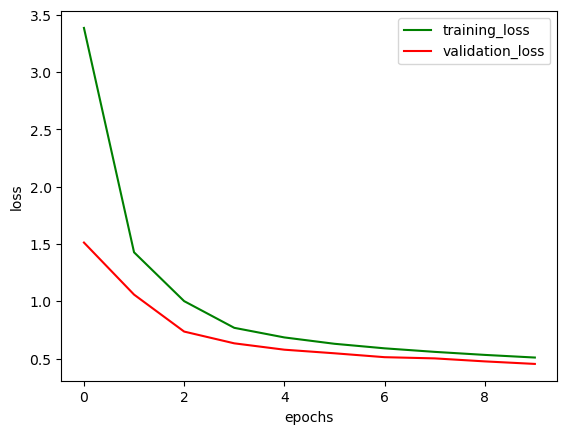

In [30]:
plt.plot(hist["loss"],label="training_loss",color="green")
plt.plot(hist["val_loss"],label="validation_loss",color="red")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()

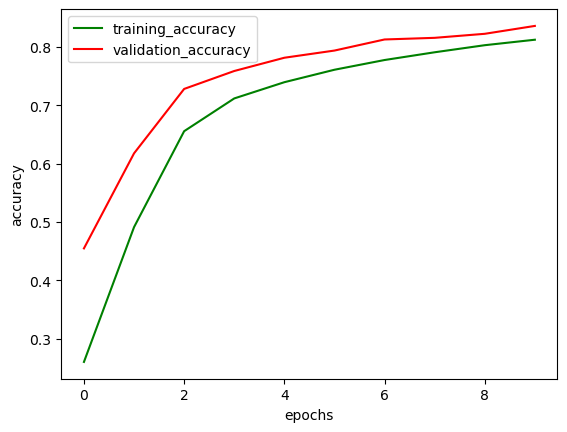

In [31]:
plt.plot(hist["accuracy"],label="training_accuracy",color="green")
plt.plot(hist["val_accuracy"],label="validation_accuracy",color="red")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()

In [35]:
import numpy as np
def predict(index):
    plt.imshow(x_test[index])
    pred_image=x_test[index].reshape(1,28,28,1)
    pred_prob=model.predict(pred_image)
    pred_class=np.argmax(pred_prob)
    print("Original class",classes[y_test[index]])
    print("Predicted class",classes[pred_class])
    

1/1 [==============================] - 0s 51ms/step
Original class Dress
Predicted class Dress


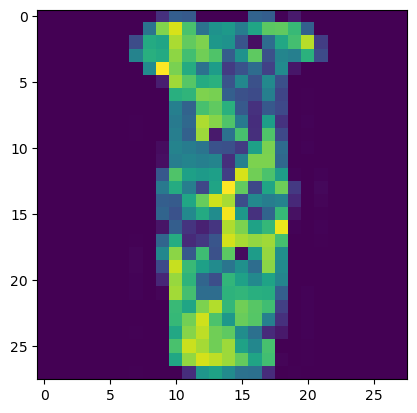

In [36]:
predict(100)